# **Riyad Morshed Shoeb**
## **Roll: 1603013**

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

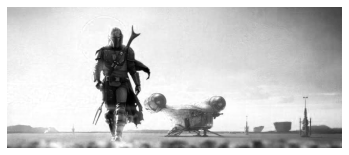

In [3]:
img = mpimg.imread('../images/mandalorian.jpeg')
img = img[:,:,0]

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def detect_edge(img, operator, threshold=48):
    rows, columns = img.shape
    new_img = np.zeros((rows, columns))
    padded_img = np.zeros((rows+2, columns+2))
    padded_img[1:-1, 1:-1] = img
    
    for r in range(1, rows):
        for c in range(1, columns):
            temp = padded_img[r-1:r+2, c-1:c+2]*operator
            temp = np.sum(temp)
            new_img[r, c] = 0 if temp<threshold else temp
    
    return new_img

## Prewitt Operator

In [4]:
prewitt_vertical_operator = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_horizontal_operator = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

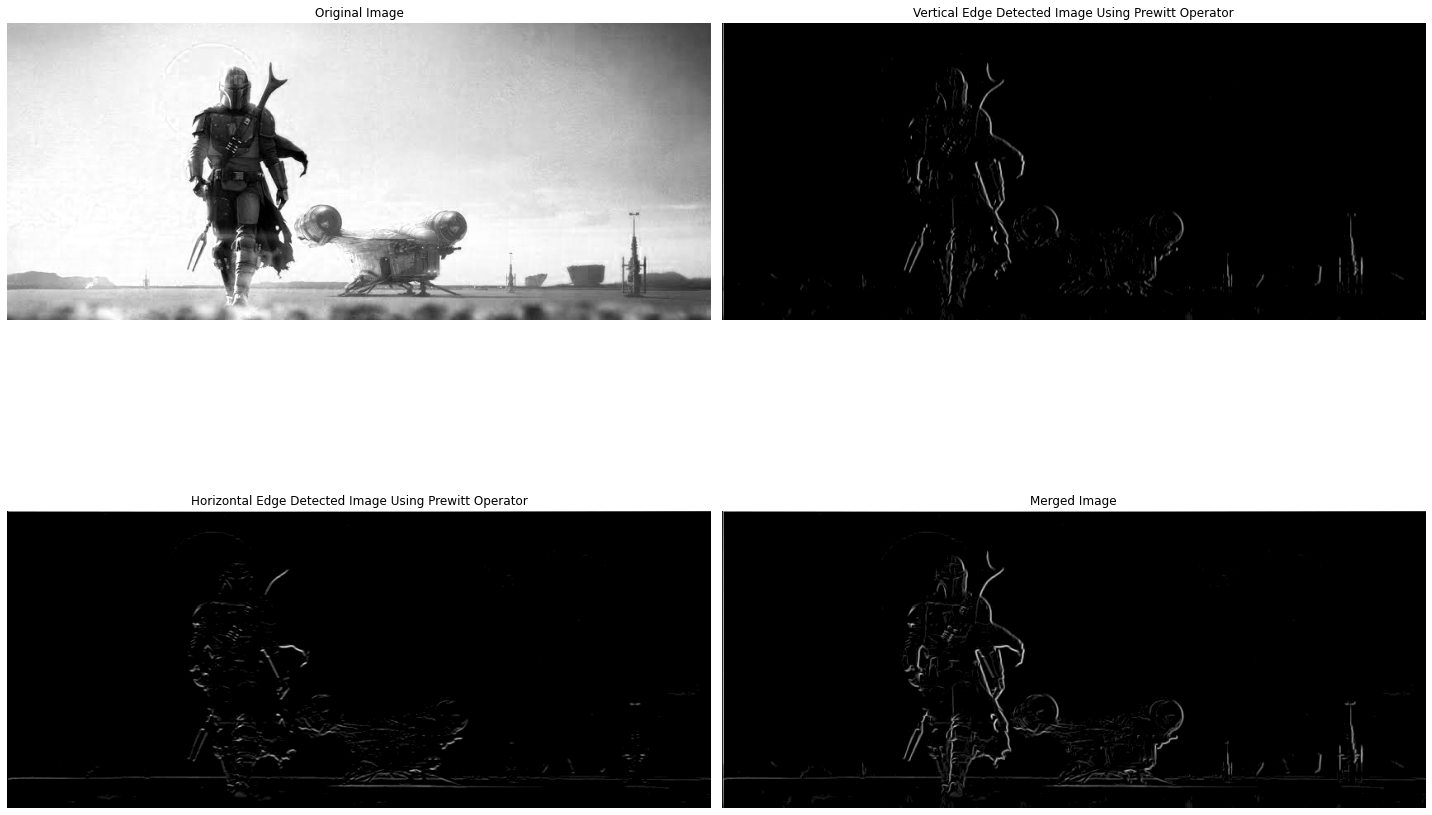

In [5]:
plt.figure(figsize=(20,16), tight_layout=True)

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
pvo = detect_edge(img, operator=prewitt_vertical_operator)
plt.imshow(pvo, cmap='gray')
plt.title('Vertical Edge Detected Image Using Prewitt Operator')
plt.axis('off')

plt.subplot(2,2,3)
pho = detect_edge(img, operator=prewitt_horizontal_operator)
plt.imshow(pho, cmap='gray')
plt.title('Horizontal Edge Detected Image Using Prewitt Operator')
plt.axis('off')

plt.subplot(2,2,4)
merged = np.sqrt(pvo**2 + pho**2)
plt.imshow(merged, cmap='gray')
plt.title('Merged Image')
plt.axis('off')

plt.show()

## Sobel Operator

In [6]:
sobel_vertical_operator = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_horizontal_operator = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

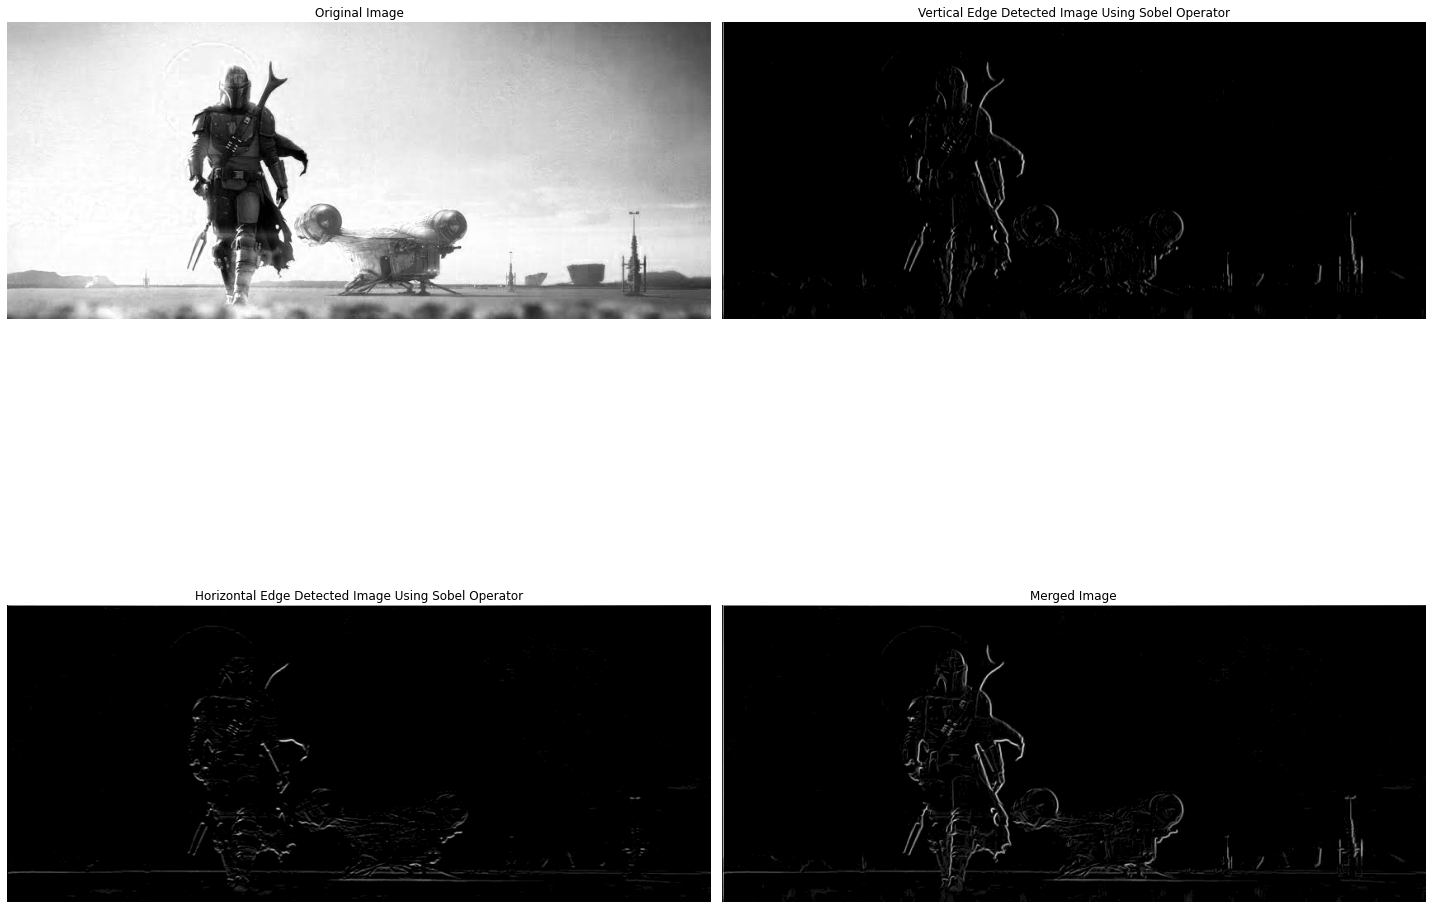

In [7]:
plt.figure(figsize=(20,20), tight_layout=True)

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
svo = detect_edge(img, operator=sobel_vertical_operator)
plt.imshow(svo, cmap='gray')
plt.title('Vertical Edge Detected Image Using Sobel Operator')
plt.axis('off')

plt.subplot(2,2,3)
sho = detect_edge(img, operator=sobel_horizontal_operator)
plt.imshow(sho, cmap='gray')
plt.title('Horizontal Edge Detected Image Using Sobel Operator')
plt.axis('off')

plt.subplot(2,2,4)
merged = np.sqrt(svo**2 + sho**2)
plt.imshow(merged, cmap='gray')
plt.title('Merged Image')
plt.axis('off')

plt.show()

## Compass Operator

In [8]:
compass_operators = []
compass_operators.append(np.array([[1,1,0],[1,0,-1],[0,-1,-1]]))
compass_operators.append(np.array([[1,1,1],[0,0,0],[-1,-1,-1]]))
compass_operators.append(np.array([[0,1,1],[-1,0,1],[-1,-1,0]]))
compass_operators.append(np.array([[1,0,-1],[1,0,-1],[1,0,-1]]))
compass_operators.append(np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
compass_operators.append(np.array([[0,-1,-1],[1,0,-1],[1,1,0]]))
compass_operators.append(np.array([[-1,-1,-1],[0,0,0],[1,1,1]]))
compass_operators.append(np.array([[-1,-1,0],[-1,0,1],[0,1,1]]))

In [9]:
titles = ['North-west', 'North', 'North-East',
         'West', 'East',
         'South-West', 'South', 'South-East']

(-0.5, 852.5, 359.5, -0.5)

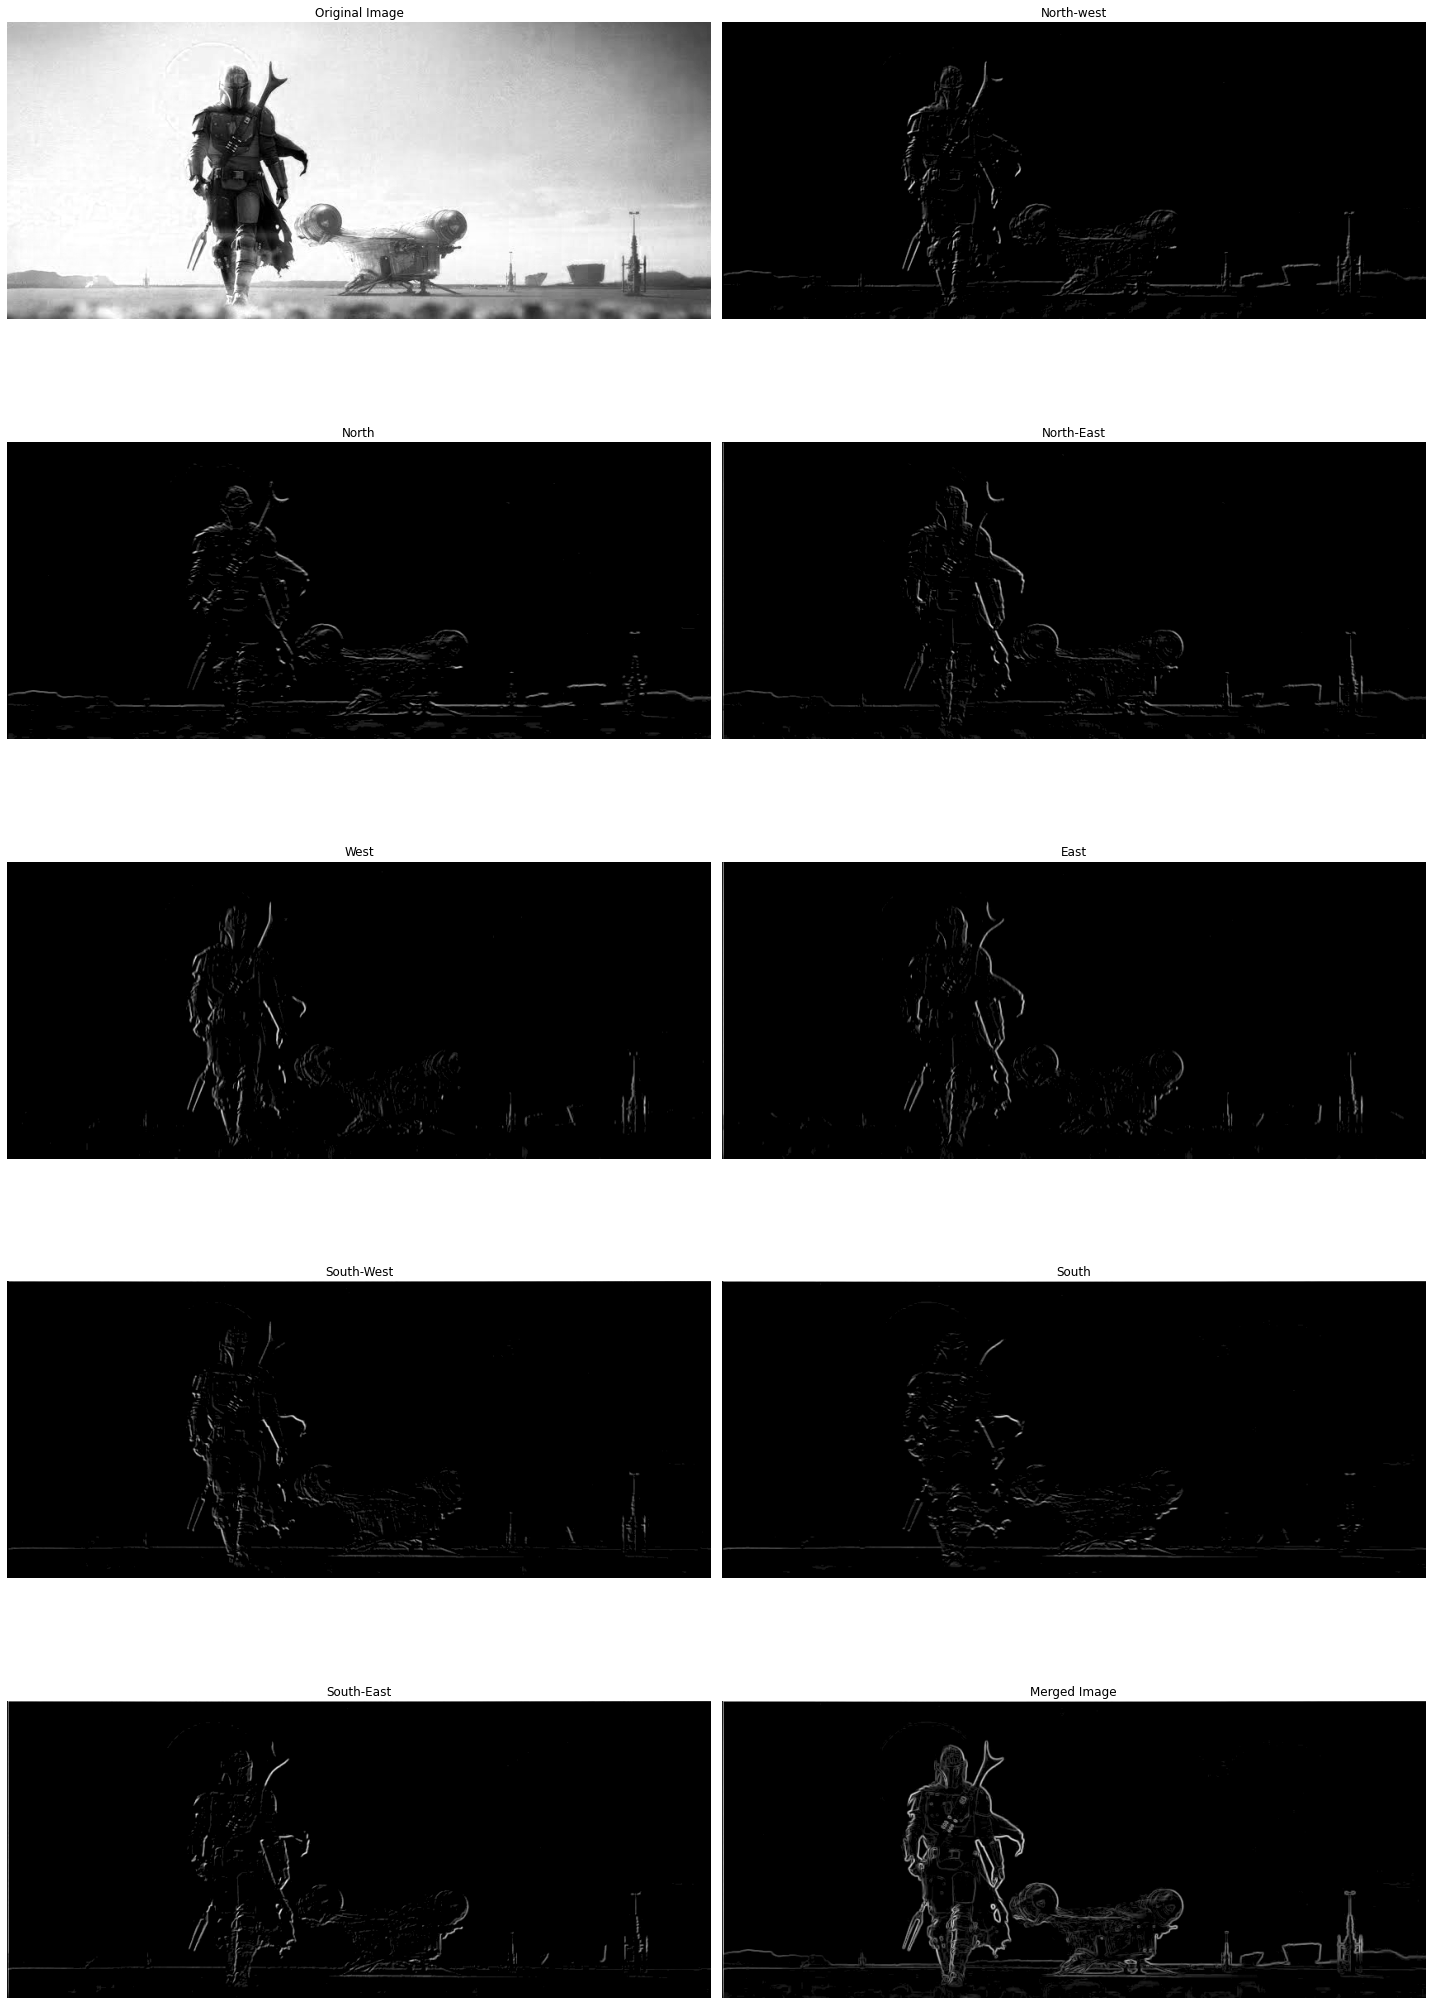

In [10]:
plt.figure(figsize=(20,30), tight_layout=True)

plt.subplot(5,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

merged = np.zeros(img.shape)
for i in range(8):
    plt.subplot(5,2,i+2)
    temp = detect_edge(img, operator=compass_operators[i])
    merged += temp**2
    plt.imshow(temp, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.subplot(5,2,10)
merged = np.sqrt(merged)
plt.imshow(merged, cmap='gray')
plt.title('Merged Image')
plt.axis('off')

## Discrete Laplacian Operator

In [11]:
a = int(input('Enter the value of a:'))

discrete_laplacian_operator = (1/(1+a))*np.array([[a, 1-a, a], [1-a,-4,1-a], [a, 1-a, a]])
discrete_laplacian_operator

Enter the value of a:0


array([[ 0.,  1.,  0.],
       [ 1., -4.,  1.],
       [ 0.,  1.,  0.]])

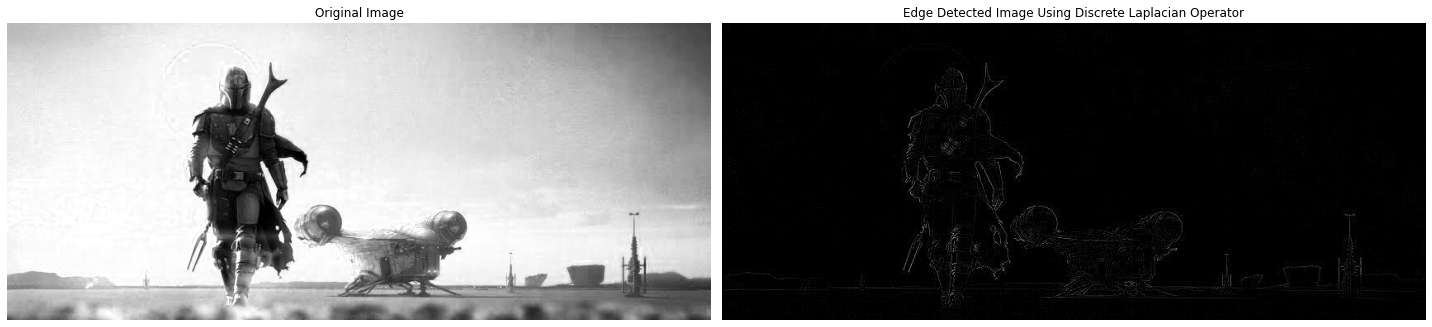

In [12]:
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
dlo = detect_edge(img, operator=discrete_laplacian_operator, threshold=0)
plt.imshow(dlo, cmap='gray')
plt.title('Edge Detected Image Using Discrete Laplacian Operator')
plt.axis('off')

plt.show()